In [0]:
from collections import defaultdict

from tqdm import tqdm
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as CMap

In [0]:
EDGE_LIST_PATH = "data/edge_list_raw.csv"
TARGET_PATH = "data/target_raw.csv"
FEATURE_PATH = "data/feature_raw.csv"

# EDGE_LIST_PATH = "data/edge_list_small.csv"
# TARGET_PATH = "data/target_small.csv"
# FEATURE_PATH = "data/feature_small.csv"


In [0]:
id2class_raw = {
    "0": "AI",
    "1": "DAT",
    "2": "NET",
    "3": "HA",
    "4": "PROG",
    "5": "HCI",
    "6": "IR",
    "7": "OS",
    "8": "DB",
    "9": "EC"
}

id2class_small = {
    "0": "GA",
    "1": "REL",
    "2": "Th",
    "3": "RUL",
    "4": "CB",
    "5": "PM",
    "6": "NN"
}

cls2hex = {
    "0": "#0000ff",
    "1": "#008000",
    "2": "#ff0000",
    "3": "#00bfbf",
    "4": "#bf00bf",
    "5": "#bfbf00",
    "6": "#00ffe7",
    "7": "#c8a3ff",
    "8": "#fe7d6a",
    "9": "#808000"
}

In [0]:
def read_graph():
    f = open(EDGE_LIST_PATH, "rb")
    next(f)
    g = nx.read_edgelist(f, delimiter=',', nodetype=str, encoding="utf-8")
    f.close()
    return g

def get_node_number():
    cnt = 0
    f = open(TARGET_PATH, "rb")
    next(f)
    cnt = sum(1 for line in f)
    f.close()
    return cnt

def get_feature_number():
    s = set()
    f = open(FEATURE_PATH, "r")
    next(f)
    for line in f:
        node_id, feature_id, _ = line.strip().split(",")
        s.add(feature_id)    
    f.close()
    return len(s)

def plot_class_distribution():
    counter = defaultdict(int)
    node2cls = dict()

    f = open(TARGET_PATH, "r")
    next(f)
    for line in f:
        node_id, class_id = line.strip().split(",")
        
        if "\t" in class_id:
            class_id = class_id.split("\t")[0]
        
        node2cls[node_id] = class_id
        counter[class_id] += 1
    f.close()
    print(counter)

    if len(counter) == 10:
        id2class = id2class_raw
    else:
        id2class = id2class_small
    
    cls_list, freq_list = [], []
    for cls, freq in sorted(counter.items(), key=lambda x: x[1], reverse=True):
        cls_list.append(id2class[cls])
        freq_list.append(freq)
    
    plt.figure(1)
    plt.bar(range(len(cls_list)), freq_list)
    plt.title("Class Distribution", fontsize=16)
    plt.xticks(range(len(cls_list)), cls_list, rotation=0)
    plt.savefig("class_distribution.png", dpi=400)
    plt.show()

    return node2cls, id2class

def plot_graph(g, node2cls, id2class):
    cc = [len(c) for c in sorted(nx.connected_components(graph), key=len, reverse=True)]
    cc_number = len(cc)
    print("Number of connected components: {}".format(cc_number))

    num_cls = len(set(node2cls.values()))
    color = [cls2hex[node2cls[node]] for node in g.nodes]

    label = [id2class[str(id)] for id in range(num_cls)]
    proxy = [plt.Circle((0, 0), 5, color=cls2hex[str(id)]) for id in range(num_cls)]
    pos = nx.nx_pydot.graphviz_layout(g, prog='neato')

    plt.figure(2, figsize=(10, 10))
    nx.draw_networkx(graph, pos=pos, with_labels=False, node_color=color,
                     node_size=10, width=0.1)
    

    plt.legend(proxy, label, loc=2)
    plt.savefig("graph.png", dpi=400)
    plt.show()




Number of nodes: 11881
Number of isolated: 410
Number of edges: 33416
Average degree: 5.6251
Number of features: 9568
defaultdict(<class 'int'>, {'2': 678, '0': 4645, '5': 649, '9': 482, '4': 1486, '1': 1390, '6': 245, '8': 588, '3': 459, '7': 1259})


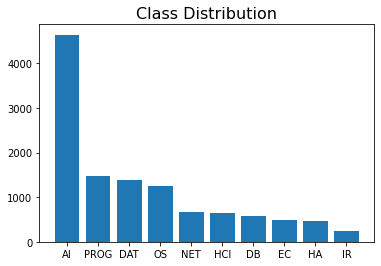

Number of connected components: 423


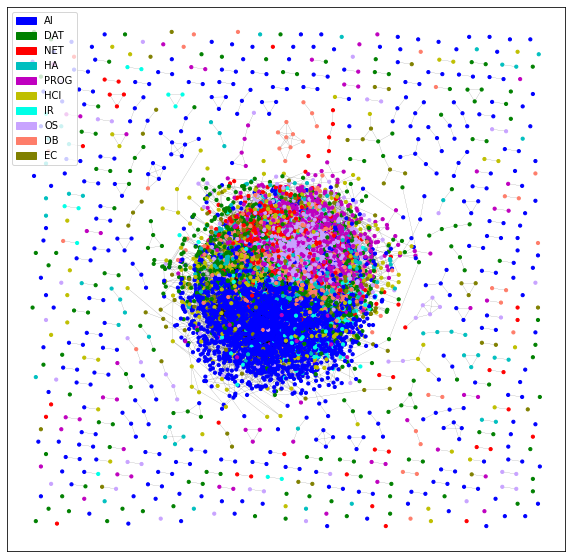

In [15]:
node_number = get_node_number()
graph = read_graph()

edge_number = graph.size()
isolated_node_number = node_number - graph.number_of_nodes()

feature_number = get_feature_number()


print("Number of nodes: {}".format(node_number))
print("Number of isolated: {}".format(isolated_node_number))
print("Number of edges: {}".format(edge_number))
print("Average degree: {:.4f}".format(2 * edge_number / node_number))

print("Number of features: {}".format(feature_number))

node2cls, id2class = plot_class_distribution()
plot_graph(graph, node2cls, id2class)